<a href="https://colab.research.google.com/github/LilPablito99/JuanPabloAlzate_Portfolio/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


import zipfile
import io

zip_file = zipfile.ZipFile(io.BytesIO(uploaded['archive3.zip']), 'r')
zip_file.extractall()
zip_file.close()

Saving archive3.zip to archive3.zip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.layers import BatchNormalization


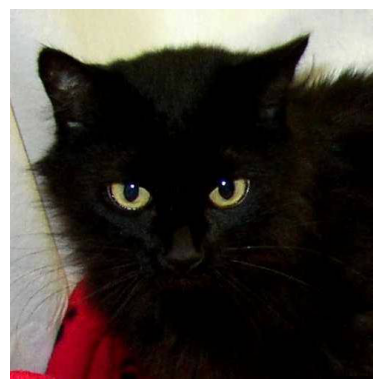

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = "/content/cats_and_dogs/test/cats/cat.1500.jpg"

imagen = mpimg.imread(ruta_imagen)

plt.imshow(imagen)
plt.axis('off')
plt.show()

In [ ]:
import random
import os


In [ ]:
perros_dir = '/content/cats_and_dogs/train/dogs'
gatos_dir = '/content/cats_and_dogs/train/cats'


data = []

for filename in os.listdir(perros_dir):
    if filename.endswith('.jpg'):
        imagen_path = os.path.join(perros_dir, filename)
        data.append((imagen_path, 'perro'))


for filename in os.listdir(gatos_dir):
    if filename.endswith('.jpg'):
        imagen_path = os.path.join(gatos_dir, filename)
        data.append((imagen_path, 'gato'))


df = pd.DataFrame(data, columns=['ruta_imagen', 'etiqueta'])

df.to_csv('etiquetas_imagenes.csv', index=False)

In [ ]:
df.tail()

,ruta_imagen,etiqueta
1995,/content/cats_and_dogs/train/cats/cat.896.jpg,gato
1996,/content/cats_and_dogs/train/cats/cat.392.jpg,gato
1997,/content/cats_and_dogs/train/cats/cat.234.jpg,gato
1998,/content/cats_and_dogs/train/cats/cat.404.jpg,gato
1999,/content/cats_and_dogs/train/cats/cat.259.jpg,gato


<Axes: >

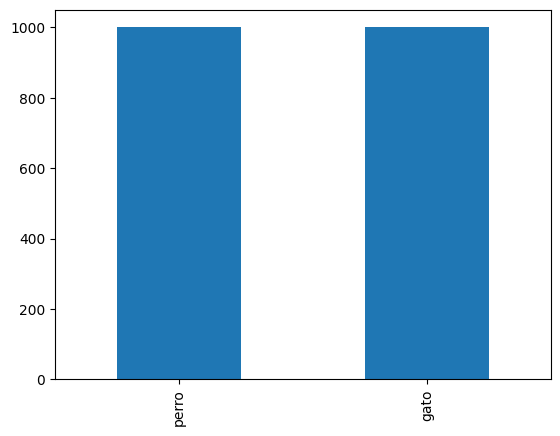

In [ ]:
df['etiqueta'].value_counts().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

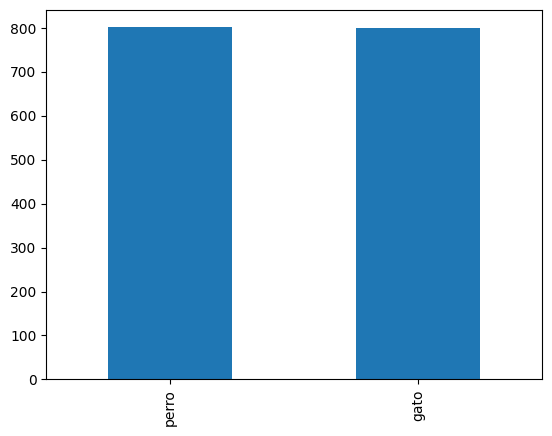

In [ ]:
train_df['etiqueta'].value_counts().plot.bar()


<Axes: >

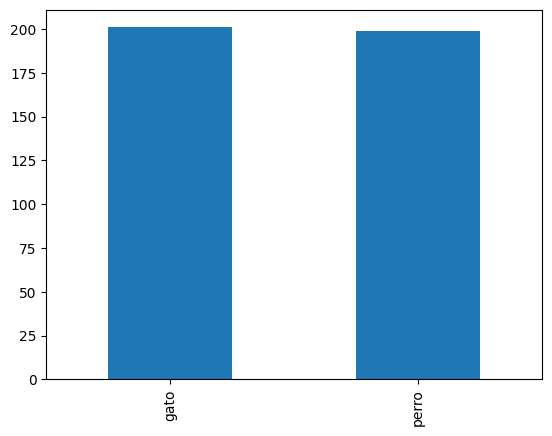

In [ ]:
validate_df['etiqueta'].value_counts().plot.bar()

In [ ]:
 model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='ruta_imagen',
    y_col='etiqueta',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validate_df,
    x_col='ruta_imagen',
    y_col='etiqueta',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 400 validated image filenames belonging to 2 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
model.load_weights('/content/modelo_perros_gatos.hdf5')

In [ ]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=70,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])


Epoch 1/70
62/62 [==============================] - ETA: 0s - loss: 0.5449 - accuracy: 0.7139
Epoch 1: val_accuracy did not improve from 0.76210
62/62 [==============================] - 202s 3s/step - loss: 0.5449 - accuracy: 0.7139 - val_loss: 1.1060 - val_accuracy: 0.5867
Epoch 2/70
62/62 [==============================] - ETA: 0s - loss: 0.5313 - accuracy: 0.7241
Epoch 2: val_accuracy did not improve from 0.76210
62/62 [==============================] - 180s 3s/step - loss: 0.5313 - accuracy: 0.7241 - val_loss: 0.6306 - val_accuracy: 0.7157
Epoch 3/70
62/62 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7160
Epoch 3: val_accuracy did not improve from 0.76210
62/62 [==============================] - 181s 3s/step - loss: 0.5462 - accuracy: 0.7160 - val_loss: 0.5002 - val_accuracy: 0.7319
Epoch 4/70
62/62 [==============================] - ETA: 0s - loss: 0.5199 - accuracy: 0.7358
Epoch 4: val_accuracy did not improve from 0.76210
62/62 [=======================

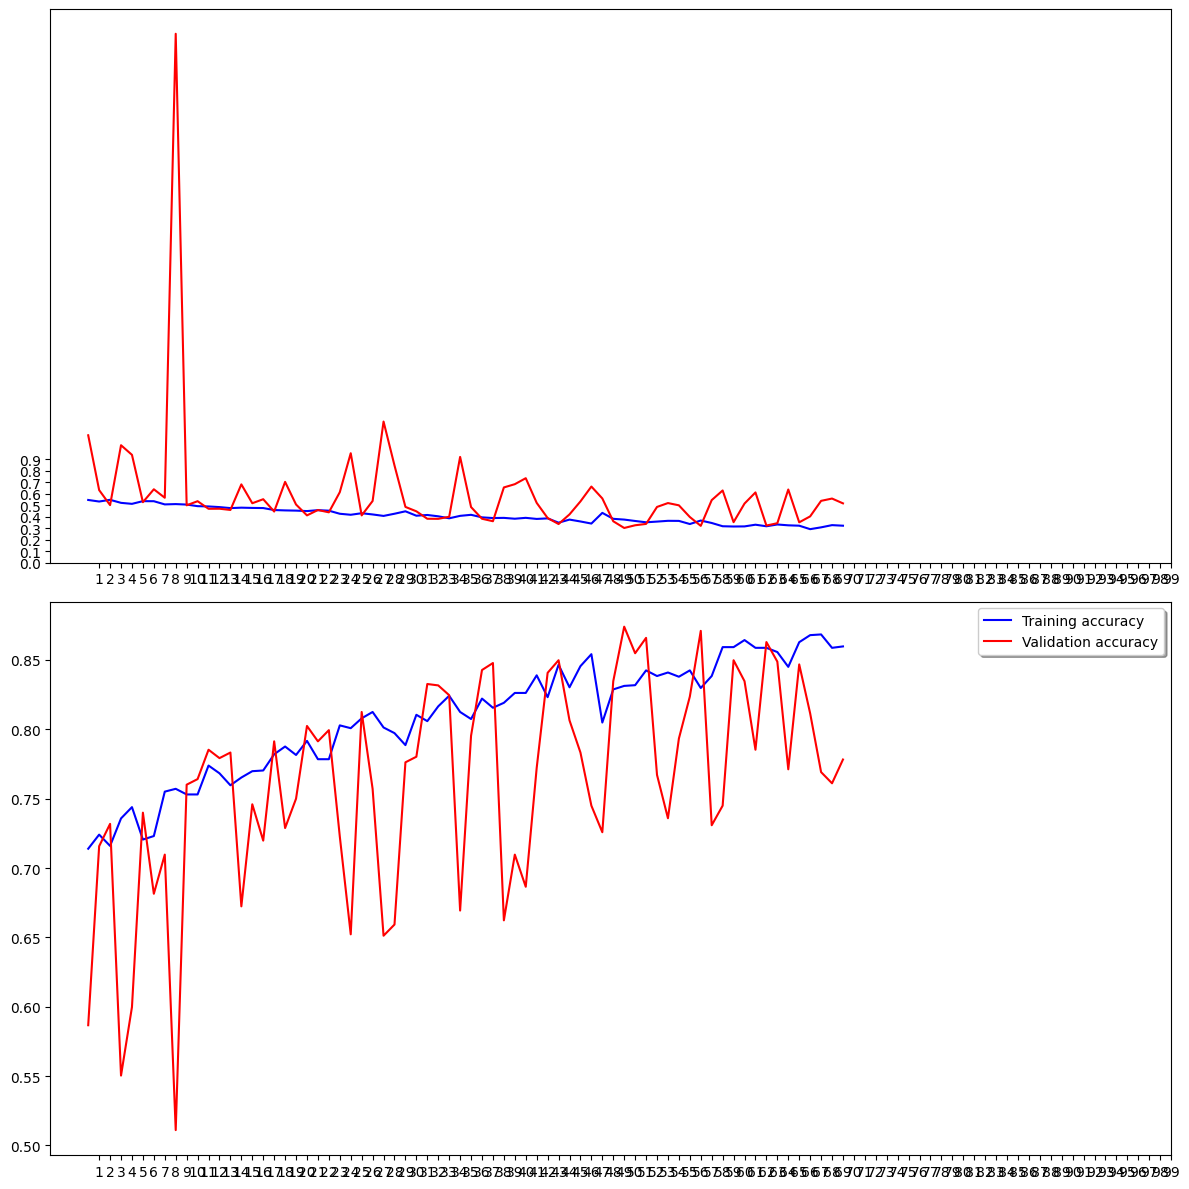

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 100, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 100, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [ ]:
model2 = model

In [ ]:
model2.load_weights('./modelo_perros_gatos.hdf5')

In [ ]:
model2.evaluate(test_generator)

32/32 [==============================] - 22s 662ms/step - loss: 0.3555 - accuracy: 0.8460


[0.3555282950401306, 0.8460000157356262]

## Modelo pre-entrenado

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_99 (BatchN  (None, 74, 74, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
last_layers = pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_99 (BatchN  (None, 74, 74, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
history_keras = model_keras.fit(
    train_generator,
    epochs = 5,
    validation_data = validation_generator
)



Epoch 1/5
50/50 [==============================] - 112s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5025
Epoch 2/5
50/50 [==============================] - 110s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5025
Epoch 3/5
50/50 [==============================] - 106s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5025
Epoch 4/5
50/50 [==============================] - 110s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5025
Epoch 5/5
50/50 [==============================] - 111s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5025
